In [2]:
import pandas as pd
import numpy as np
import requests

In [ ]:
cdot = pd.read_csv("CDOT_cleaned_2019.csv")

In [ ]:
waze = pd.read_csv("Waze_Cleaned.csv")

In [ ]:
weather = pd.read_csv("Weather_cleaned.csv")

In [ ]:
cdot.head()

,Unnamed: 0,date_time,loc_01,severity,condition,lighting
0,0,2019-01-28 12:00:00,11200 HWY 83,INJ,SNOWY,DAYLIGHT
1,1,2019-07-01 01:00:00,S 13TH ST,PDO,DRY,DARK-LIGHTED
2,2,2019-07-08 18:00:00,S 14TH ST,PDO,DRY,DAYLIGHT
3,3,2019-12-17 16:00:00,S 14TH ST,INJ,ICY,DAYLIGHT
4,4,2019-06-17 07:00:00,S 15TH ST,PDO,DRY,DAYLIGHT


In [ ]:
# Relevant Roads
roads = ['S ACADEMY BLVD', 'SH-115','E LAS VEGAS ST', 'I-25', 'VENETUCCI BLVD', \
         'LAKE AVE', 'S NEVADA AVE', 'Bandley Dr', 'N Santa Fe Ave', \
         'FOUNTAIN MESA RD', 'E MESA RIDGE PKWY', 'MESA RIDGE PKWY', 'E OHIO AVE',\
         'FONTAINE BLVD', 'CHARTER OAK RANCH RD', 'MAGRATH AVE', 'BARKELEY AVE', \
         'WESTMEADOW DR', 'CHILES AVE', 'BROADMOOR BLUFFS DR', 'NORAD RD', 'NELSON BLVD']

In [ ]:
#replacing HWY 115 
cdot_filtered = cdot.loc[cdot["loc_01"].isin(roads),:].reset_index(drop = True)

In [ ]:
cdot_filtered.drop(columns = "Unnamed: 0", inplace=True)

In [ ]:
len(roads)

22

In [ ]:
cdot_filtered["loc_01"].unique()

array(['S ACADEMY BLVD', 'BROADMOOR BLUFFS DR', 'CHARTER OAK RANCH RD',
       'FONTAINE BLVD', 'FOUNTAIN MESA RD', 'LAKE AVE', 'E LAS VEGAS ST',
       'MAGRATH AVE', 'MESA RIDGE PKWY', 'E MESA RIDGE PKWY',
       'S NEVADA AVE', 'NORAD RD', 'E OHIO AVE', 'VENETUCCI BLVD',
       'WESTMEADOW DR', 'I-25', 'SH-115'], dtype=object)

In [ ]:
waze["street"] = waze["street"].replace({'I-25 N': 'I-25', 'I-25 S': 'I-25'})

In [ ]:
waze_filtered = waze.loc[waze["street"].str.upper().isin(roads),:]

In [ ]:
waze_filtered["street"].unique()

array(['Mesa Ridge Pkwy', 'Venetucci Blvd', 'Fountain Mesa Rd',
       'Lake Ave', 'Magrath Ave', 'Charter Oak Ranch Rd', 'Westmeadow Dr',
       'Barkeley Ave', 'E Las Vegas St', 'Fontaine Blvd', 'Chiles Ave',
       'Nelson Blvd', 'E Ohio Ave', 'Broadmoor Bluffs Dr', 'Norad Rd',
       'I-25', 'SH-115', 'S Nevada Ave', 'S Academy Blvd'], dtype=object)

In [ ]:
waze_filtered.head()

,Unnamed: 0,street,highway,detectionDateTS,driversCount,regularSpeed,jamLevel,time
17,17,Mesa Ridge Pkwy,True,2021-06-12 19:08:07 UTC,8,87.54,4,2021061212
32,32,Venetucci Blvd,True,2019-11-18 01:16:20 UTC,7,45.87,4,2019111718
35,35,Fountain Mesa Rd,False,2020-10-21 00:38:50 UTC,4,41.40,4,2020102017
65,65,Lake Ave,True,2020-02-21 02:20:31 UTC,72,42.04,4,2020022019
89,89,Magrath Ave,False,2019-12-18 13:05:30 UTC,5,39.01,4,2019121806


In [ ]:
waze_filtered["detectionDateTS"] = pd.to_datetime(waze_filtered["detectionDateTS"])

<ipython-input-26-8549105e376d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_filtered["detectionDateTS"] = pd.to_datetime(waze_filtered["detectionDateTS"])


In [ ]:
waze_filtered["detectionDateTS"] = waze_filtered["detectionDateTS"].dt.round("H")

<ipython-input-27-58e8dfd3e86d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waze_filtered["detectionDateTS"] = waze_filtered["detectionDateTS"].dt.round("H")


In [ ]:
waze_filtered = waze_filtered.loc[waze_filtered["detectionDateTS"].dt.year == 2019,:]
waze_filtered.drop(columns="Unnamed: 0", inplace=True)
waze_filtered.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
waze_filtered.drop(columns="time", inplace=True)

In [ ]:
waze_filtered

,street,highway,detectionDateTS,driversCount,regularSpeed,jamLevel
0,Venetucci Blvd,True,2019-11-18 01:00:00+00:00,7,45.87,4
1,Magrath Ave,False,2019-12-18 13:00:00+00:00,5,39.01,4
2,Venetucci Blvd,True,2019-05-17 19:00:00+00:00,23,46.54,4
3,Lake Ave,True,2019-10-04 22:00:00+00:00,15,26.84,4
4,Magrath Ave,False,2019-12-18 13:00:00+00:00,5,36.07,4
...,...,...,...,...,...,...
10155,S Academy Blvd,False,2019-08-08 18:00:00+00:00,9,45.56,3
10156,S Academy Blvd,False,2019-06-19 23:00:00+00:00,16,72.62,4
10157,S Academy Blvd,False,2019-05-30 20:00:00+00:00,10,38.47,4
10158,S Academy Blvd,False,2019-11-06 01:00:00+00:00,17,53.99,4


In [ ]:
cdot_filtered['date_time'] = pd.to_datetime(cdot_filtered['date_time'], utc=True)

In [ ]:
weather.drop(columns = "Unnamed: 0", inplace=True)
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'],utc=True)

In [ ]:
weather.head()

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_description
0,2015-01-01 00:00:00+00:00,19.058,1020,48,4.6,150,NaN,NaN,20,4
1,2015-01-01 01:00:00+00:00,21.614,1019,57,2.1,190,NaN,NaN,1,28
2,2015-01-01 02:00:00+00:00,21.830,1019,54,3.1,180,NaN,NaN,1,28
3,2015-01-01 03:00:00+00:00,17.600,1019,66,1.0,300,NaN,NaN,1,28
4,2015-01-01 04:00:00+00:00,17.474,1019,68,0.5,160,NaN,NaN,1,28


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45728 entries, 0 to 45727
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   dt_iso               45728 non-null  datetime64[ns, UTC]
 1   temp                 45728 non-null  float64            
 2   pressure             45728 non-null  int64              
 3   humidity             45728 non-null  int64              
 4   wind_speed           45728 non-null  float64            
 5   wind_deg             45728 non-null  int64              
 6   rain_1h              3757 non-null   float64            
 7   snow_1h              1967 non-null   float64            
 8   clouds_all           45728 non-null  int64              
 9   weather_description  45728 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(5)
memory usage: 3.5 MB


In [ ]:
weather_filtered  = weather.groupby('dt_iso')[list(weather.columns)[1:9]].mean()

In [ ]:
weather_filtered['weather_description'] = weather.groupby('dt_iso')['weather_description'].max()

In [ ]:
weather_filtered.reset_index(inplace=True)

In [ ]:
waze_weather = waze_filtered.merge(weather_filtered, 'left', left_on='detectionDateTS', right_on='dt_iso')

In [ ]:
waze_weather.drop(columns='dt_iso', inplace=True)

In [ ]:
cdot_filtered['crash'] = 1

In [ ]:
cdot_target = cdot_filtered.groupby(['date_time','loc_01'])['crash'].sum()
cdot_merge = pd.DataFrame(cdot_target).reset_index()

In [ ]:
cdot_merge

,date_time,loc_01,crash
0,2019-01-01 15:00:00+00:00,I-25,1
1,2019-01-02 15:00:00+00:00,I-25,1
2,2019-01-02 15:00:00+00:00,S ACADEMY BLVD,1
3,2019-01-02 16:00:00+00:00,I-25,2
4,2019-01-02 17:00:00+00:00,I-25,2
...,...,...,...
1854,2019-12-31 15:00:00+00:00,FONTAINE BLVD,1
1855,2019-12-31 16:00:00+00:00,S ACADEMY BLVD,1
1856,2019-12-31 18:00:00+00:00,S ACADEMY BLVD,1
1857,2019-12-31 21:00:00+00:00,FOUNTAIN MESA RD,1


In [ ]:
train = waze_weather.merge(cdot_merge,'left',right_on=['date_time','loc_01'],left_on=['detectionDateTS','street'])

In [ ]:
train['crash'] = train['crash'].fillna(0)

In [ ]:
train['crash'] = train['crash'].replace({2.0:1.0})

In [ ]:
train.drop(columns=['date_time','loc_01'], inplace=True)

In [ ]:
train.shape

(10160, 16)

In [ ]:
train.describe(include='all')

<ipython-input-48-b6306ef0345f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(include='all')


,street,highway,detectionDateTS,driversCount,regularSpeed,jamLevel,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_description,crash
count,10160,10160,10160,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000,833.000000,3257.000000,10160.000000,10160.000000,10160.000000
unique,16,2,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I-25,True,2019-11-22 17:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8624,9597,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2019-04-22 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-30 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,83.102657,96.572274,2.532382,43.442974,1016.495965,62.290748,1.765637,153.649213,1.452317,0.505698,59.165157,18.654134,0.093307
std,NaN,NaN,NaN,92.039233,28.987840,1.123943,22.558947,7.536569,24.231057,2.206836,108.432731,2.222322,0.409051,33.535519,11.264411,0.290877
min,NaN,NaN,NaN,1.000000,14.850000,1.000000,4.730000,993.000000,7.000000,0.000000,0.000000,0.110000,0.110000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,15.000000,77.520000,2.000000,23.828000,1014.000000,41.000000,0.450000,60.000000,0.290000,0.250000,20.000000,5.000000,0.000000


In [ ]:
#X, y 

X = train.iloc[:,:15].drop(columns="detectionDateTS")
y = train['crash']

In [ ]:
#One hot encoding
X = X.replace({'True':1,'False':0})

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X.iloc[:,1:14]=scaler.fit_transform(X.iloc[:,1:14])

In [ ]:
X.head()

,street,highway,driversCount,regularSpeed,jamLevel,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_description
0,Venetucci Blvd,1.0,0.007109,0.267137,1.0,0.410718,0.625,0.613636,0.029221,0.261111,NaN,NaN,0.000000,0.800000
1,Magrath Ave,0.0,0.004739,0.208061,1.0,0.185163,0.800,0.636364,0.029221,0.658333,NaN,NaN,0.000000,0.800000
2,Venetucci Blvd,1.0,0.026066,0.272907,1.0,0.742452,0.100,0.125000,0.377273,0.366667,NaN,NaN,0.438202,0.685714
3,Lake Ave,1.0,0.016588,0.103255,1.0,0.761448,0.500,0.306818,0.402597,0.416667,NaN,NaN,0.000000,0.800000
4,Magrath Ave,0.0,0.004739,0.182742,1.0,0.185163,0.800,0.636364,0.029221,0.658333,NaN,NaN,0.000000,0.800000


In [ ]:
#one-hot encoding
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X = X.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Classification Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth = 15)
clf.fit(X_train,y_train)
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, ytest_pred)

0.9895988112927193

In [ ]:
f1_score(y_train, ytrain_pred)

1.0

In [ ]:
#feature importances
importances = clf.feature_importances_

In [ ]:
clf.feature_names_in_

array(['highway', 'driversCount', 'regularSpeed', 'jamLevel', 'temp',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'snow_1h', 'clouds_all', 'weather_description',
       'street_Broadmoor Bluffs Dr', 'street_Chiles Ave',
       'street_E Las Vegas St', 'street_E Ohio Ave',
       'street_Fountain Mesa Rd', 'street_I-25', 'street_Lake Ave',
       'street_Magrath Ave', 'street_Mesa Ridge Pkwy',
       'street_Nelson Blvd', 'street_Norad Rd', 'street_S Academy Blvd',
       'street_S Nevada Ave', 'street_SH-115', 'street_Venetucci Blvd'],
      dtype=object)

In [ ]:
clf.classes_

array([0., 1.])

In [ ]:
for i,v in enumerate(importances):
	print('Feature: '+clf.feature_names_in_[i]+'\t\t\tScore: '+str(v))

Feature: highway			Score: 0.0
Feature: driversCount			Score: 0.040344299947199354
Feature: regularSpeed			Score: 0.08106289637408352
Feature: jamLevel			Score: 0.0
Feature: temp			Score: 0.11815953106368389
Feature: pressure			Score: 0.11766824237718645
Feature: humidity			Score: 0.20117597135575468
Feature: wind_speed			Score: 0.0958466651819173
Feature: wind_deg			Score: 0.18198953658236033
Feature: rain_1h			Score: 0.0002464825266840412
Feature: snow_1h			Score: 0.0015005938886346378
Feature: clouds_all			Score: 0.09816134656639226
Feature: weather_description			Score: 0.05698457635948795
Feature: street_Broadmoor Bluffs Dr			Score: 0.0
Feature: street_Chiles Ave			Score: 0.0
Feature: street_E Las Vegas St			Score: 0.0
Feature: street_E Ohio Ave			Score: 0.0
Feature: street_Fountain Mesa Rd			Score: 0.0
Feature: street_I-25			Score: 0.0
Feature: street_Lake Ave			Score: 0.0
Feature: street_Magrath Ave			Score: 0.0
Feature: street_Mesa Ridge Pkwy			Score: 0.0
Feature: street_Nelson B

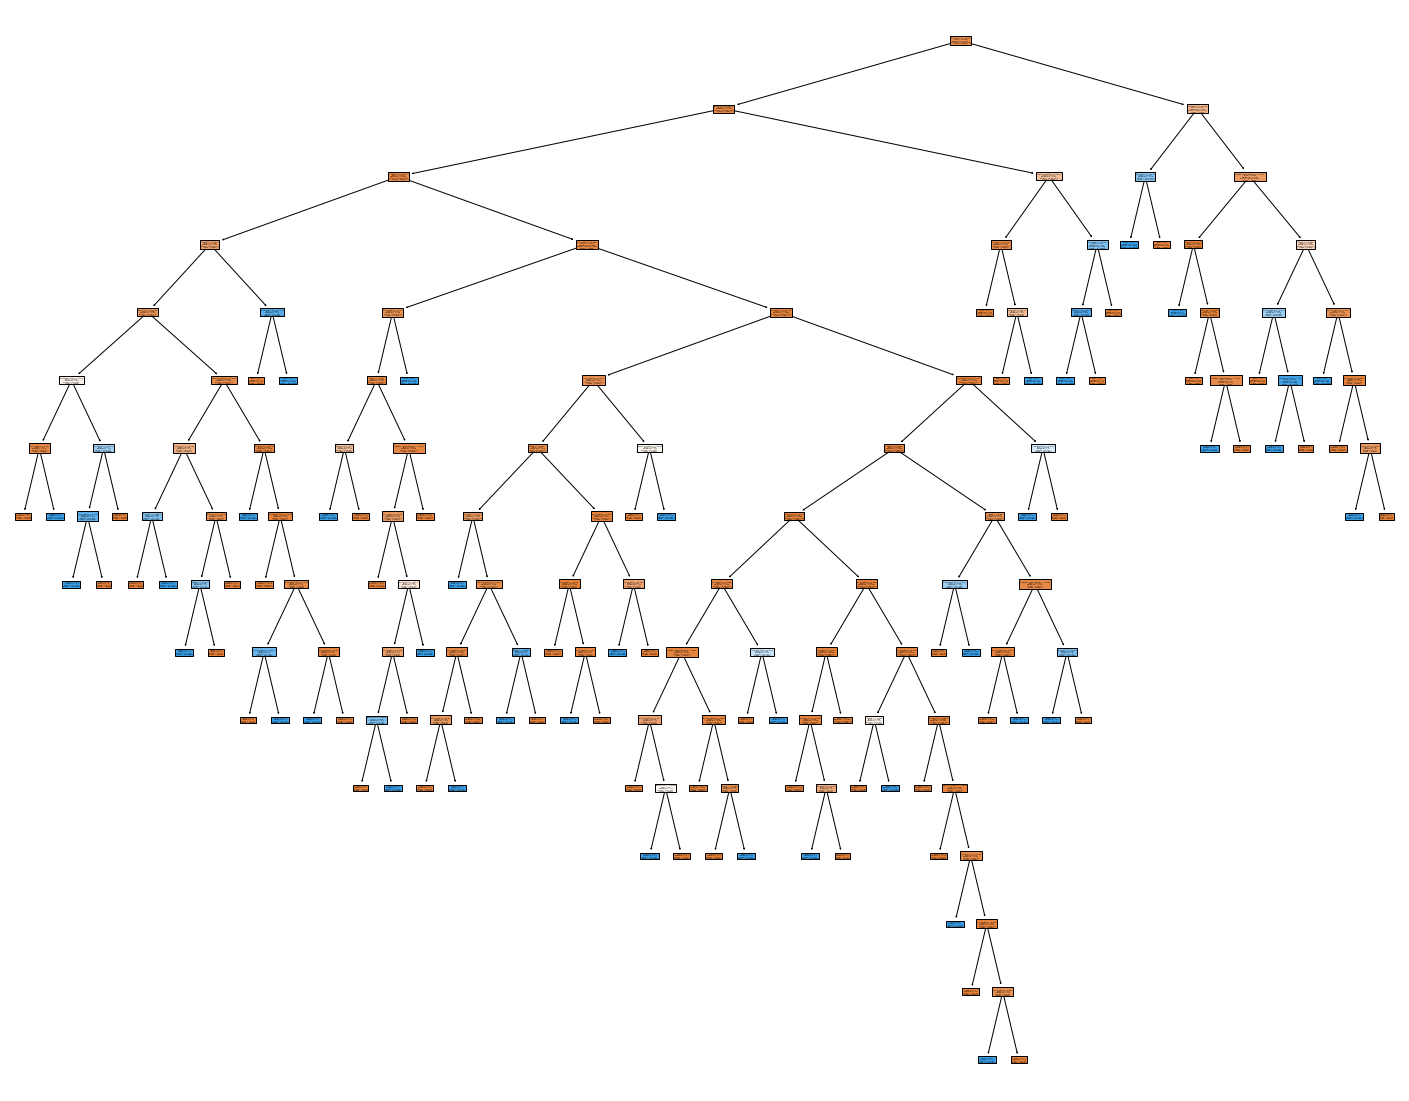

In [ ]:
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization
from sklearn import tree

rcParams['figure.figsize'] = (25, 20)

tree.plot_tree(clf,feature_names = clf.feature_names_in_, 
          class_names = np.array(['crash','no crash']), 
          filled = True)

plt.savefig('tree_visualization.png')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0, max_depth=6, n_estimators=20)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=20, random_state=0)

In [ ]:
y_test_predict_gbm = clf.predict(X_test)

In [ ]:
y_train_predict_gbm = clf.predict(X_train)

In [ ]:
f1_score(y_test, y_test_predict_gbm)

0.8844884488448845

In [ ]:
f1_score(y_train, y_train_predict_gbm)

0.8979223125564588

In [ ]:
for i,v in enumerate(importances):
	print('Feature: '+clf.feature_names_in_[i]+'\t\t\tScore: '+str(v))

Feature: highway			Score: 0.0
Feature: driversCount			Score: 0.040344299947199354
Feature: regularSpeed			Score: 0.08106289637408352
Feature: jamLevel			Score: 0.0
Feature: temp			Score: 0.11815953106368389
Feature: pressure			Score: 0.11766824237718645
Feature: humidity			Score: 0.20117597135575468
Feature: wind_speed			Score: 0.0958466651819173
Feature: wind_deg			Score: 0.18198953658236033
Feature: rain_1h			Score: 0.0002464825266840412
Feature: snow_1h			Score: 0.0015005938886346378
Feature: clouds_all			Score: 0.09816134656639226
Feature: weather_description			Score: 0.05698457635948795
Feature: street_Broadmoor Bluffs Dr			Score: 0.0
Feature: street_Chiles Ave			Score: 0.0
Feature: street_E Las Vegas St			Score: 0.0
Feature: street_E Ohio Ave			Score: 0.0
Feature: street_Fountain Mesa Rd			Score: 0.0
Feature: street_I-25			Score: 0.0
Feature: street_Lake Ave			Score: 0.0
Feature: street_Magrath Ave			Score: 0.0
Feature: street_Mesa Ridge Pkwy			Score: 0.0
Feature: street_Nelson B

AttributeError: ignored

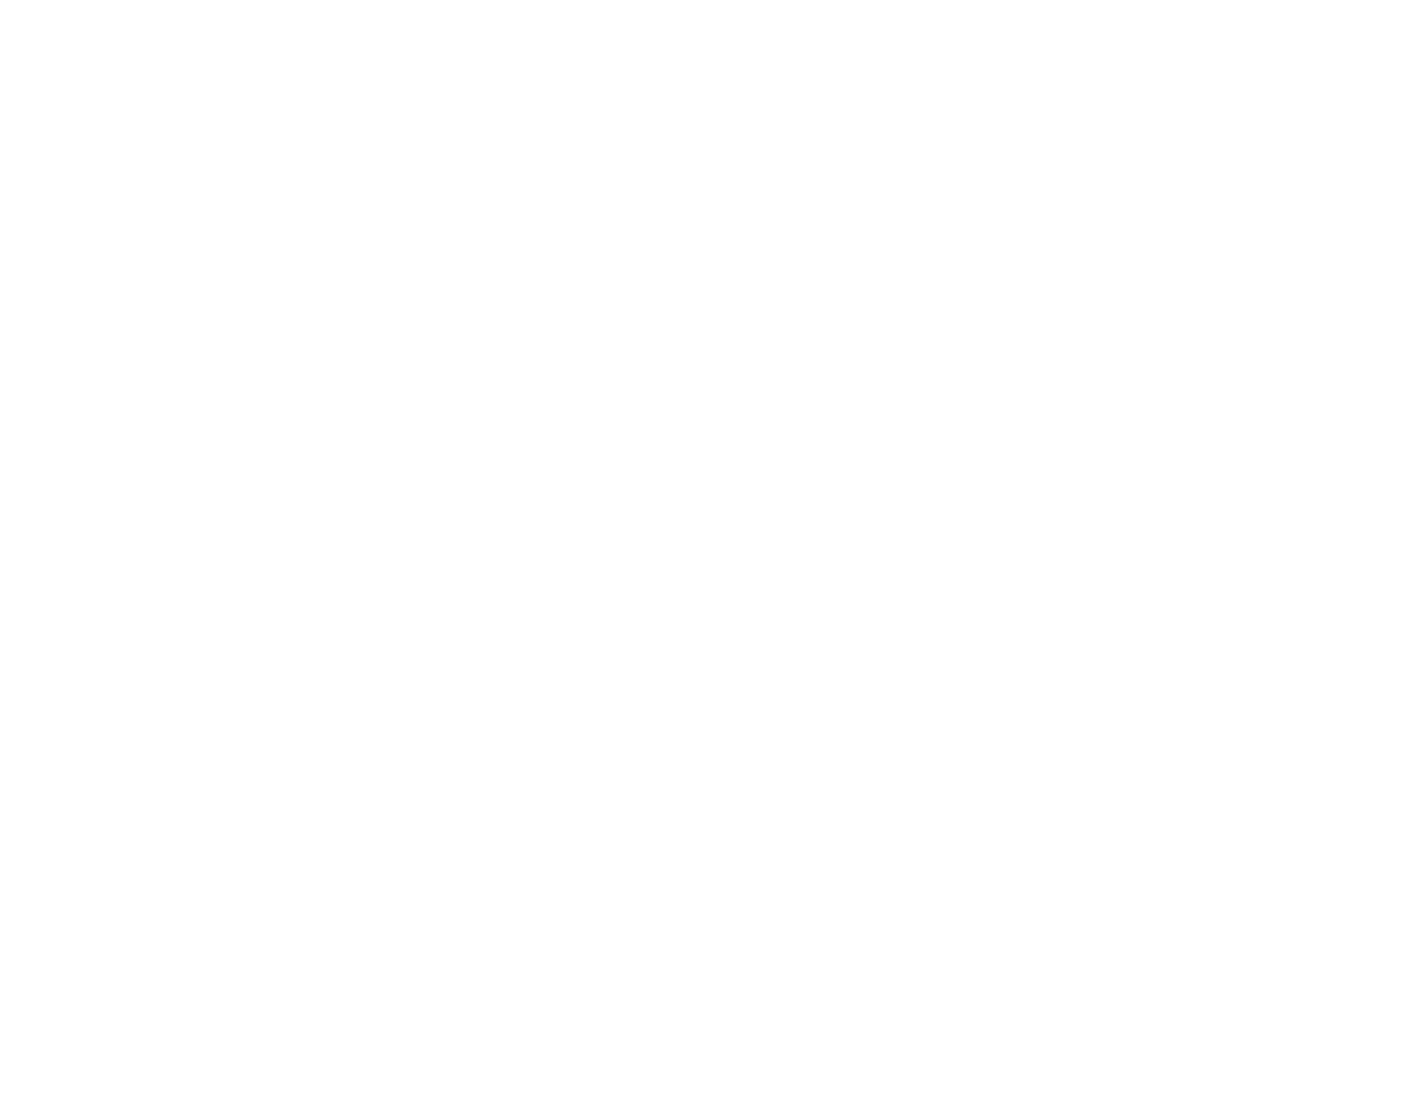

In [ ]:
tree.plot_tree(clf,feature_names = clf.feature_names_in_,class_names = np.array(['crash','no crash']),filled = True)
plt.savefig('tree_visualization_gbm.png')

In [3]:
key = '966b218f226c901278d784736dd591bf'

In [ ]:
url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format('Colorado Springs', key)
res = requests.get(url)
data = res.json()

In [ ]:
data

{'coord': {'lon': -104.8214, 'lat': 38.8339},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 274.43,
  'feels_like': 269.49,
  'temp_min': 271.48,
  'temp_max': 276.83,
  'pressure': 1006,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 160},
 'clouds': {'all': 100},
 'dt': 1671050832,
 'sys': {'type': 2,
  'id': 2011143,
  'country': 'US',
  'sunrise': 1671027000,
  'sunset': 1671061091},
 'timezone': -25200,
 'id': 5417598,
 'name': 'Colorado Springs',
 'cod': 200}

In [4]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat={}&lon={}&appid={}'.format('38.8339', '-104.8214', key)
res = requests.get(url)
data = res.json()

In [33]:
import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
print(tomorrow.day)

16


In [38]:
record_db = pd.DataFrame(columns=['street','00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00'])

In [42]:
weather_every3 = []
values = data['list']
for item in values:
  if(tomorrow.strftime("%Y-%m-%d") in item['dt_txt']):
    each_record = []
    #each_record.append(item['dt_txt'])    
    each_record.append(item['main']['temp'])
    each_record.append(item['main']['pressure'])
    each_record.append(item['main']['humidity'])
    each_record.append(item['wind']['speed'])
    each_record.append(item['wind']['deg'])
    each_record.append(item['weather'][0]['main'])
    weather_every3.append(each_record)

print(weather_every3)

[[268.09, 1020, 82, 1.4, 92, 'Snow'], [267.41, 1022, 90, 0.72, 95, 'Snow'], [265.99, 1024, 85, 0.56, 271, 'Snow'], [264.34, 1026, 71, 1.71, 280, 'Clouds'], [263.7, 1026, 55, 2.47, 283, 'Clouds'], [264.67, 1027, 49, 2.72, 291, 'Clear'], [270.11, 1023, 26, 0.83, 266, 'Clear'], [271.54, 1020, 23, 0.12, 98, 'Clouds']]


In [8]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1671116400,
   'main': {'temp': 266.08,
    'feels_like': 266.08,
    'temp_min': 266.08,
    'temp_max': 268.25,
    'pressure': 1014,
    'sea_level': 1014,
    'grnd_level': 812,
    'humidity': 52,
    'temp_kf': -2.17},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03d'}],
   'clouds': {'all': 35},
   'wind': {'speed': 1.23, 'deg': 214, 'gust': 2.08},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2022-12-15 15:00:00'},
  {'dt': 1671127200,
   'main': {'temp': 268.74,
    'feels_like': 264.55,
    'temp_min': 268.74,
    'temp_max': 270.61,
    'pressure': 1016,
    'sea_level': 1016,
    'grnd_level': 812,
    'humidity': 46,
    'temp_kf': -1.87},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 62},
   'wind': {'speed': 2.81, 'deg': 150, 'gust': 3.56},
   

In [ ]:
len(data['list'])

40